# *Recognition of spoken digits using Deep learning frameworks*

In [1]:
import utils # We import the utility library that we will use throughout this Notebook

### 1. Reading the data

In [2]:
# Data parser reads the wave forms of the wav files located in digits directory
wavs, speakers, digits = utils.data_parser()

### 2. Visualizing & Displaying some samples of the dataset

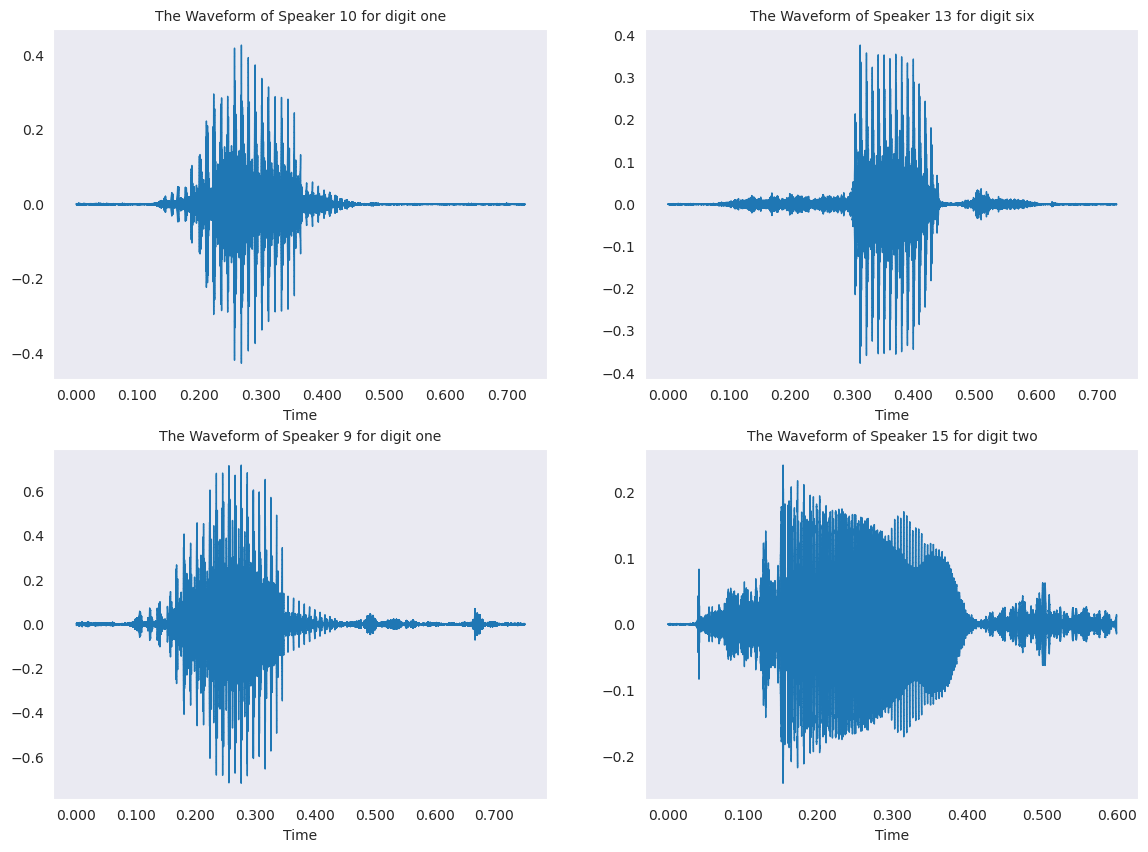

In [3]:
utils.vis_wave_form(wavs[:4], speakers[:4], digits[:4])

In [4]:
# Sample 1
import IPython.display as ipd 
import os
ipd.Audio(os.path.join("digits", digits[0]+speakers[0] + ".wav"))

In [5]:
# Sample 2
ipd.Audio(os.path.join("digits", digits[1]+speakers[1]+ ".wav"))

In [6]:
# Sample 3
ipd.Audio(os.path.join("digits", digits[2]+speakers[2]+ ".wav"))

In [7]:
# Sample 4
ipd.Audio(os.path.join("digits", digits[3]+speakers[3]+ ".wav"))

### 3. Extracting the MFCCs, deltas and delta-deltas for each audio sample.

In [8]:
mfccs, deltas, ddeltas = utils.extract_mfcss(wavs)

Extracting delta-deltas...: 100%|██████████| 133/133 [00:00<00:00, 1849.73it/s]


### 4. Combining MFCCs, Deltas and Delta-Deltas to create a feature vector - Testing some classic ML Classifiers

In [9]:
import numpy as np

features = np.empty((0,78), dtype = np.float32)

for i in range(len(mfccs)):
    feature_vector = np.concatenate((mfccs[i], deltas[i], ddeltas[i]), axis = 1)
    mean_vector = np.mean(feature_vector, axis = 0)
    sd_vector = np.std(feature_vector, axis = 0)
    nums = len(mean_vector)
    feature_vector = np.resize(np.concatenate((mean_vector, sd_vector), axis =0), (1,2*nums))
    features = np.append(features, feature_vector, axis = 0)


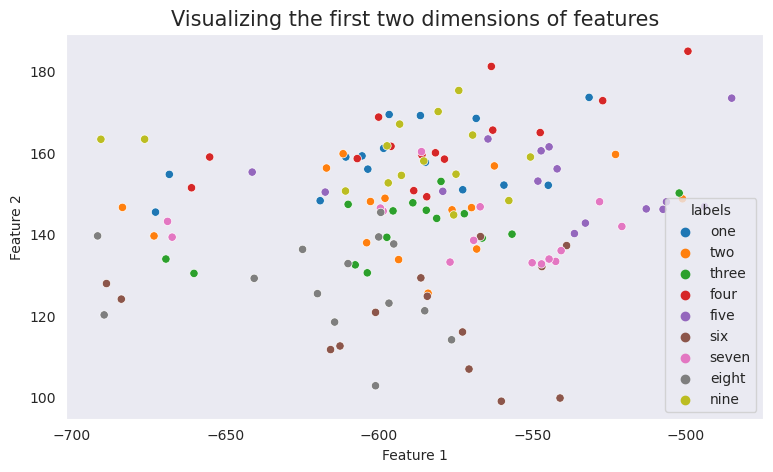

In [10]:
# Create a 2D - Scatterplot of the feature vector for each digit

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

correspondence = {"one":1, "two": 2, "three": 3, "four": 4,
"five":5, "six":6, "seven": 7, "eight": 8, "nine": 9}
nums = []
for digit in digits:
    nums.append(correspondence[digit])

data = pd.DataFrame({"x": features[:,0], "y": features[:,1],
                    "labels": digits, "nums": nums}).sort_values(by = "nums")

sns.set_style("dark")
fig, ax = plt.subplots(figsize = (9,5))

sns.scatterplot(data = data, x = "x", y = "y", hue = "labels",
ax = ax)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("Visualizing the first two dimensions of features",fontsize = 15)
plt.show()

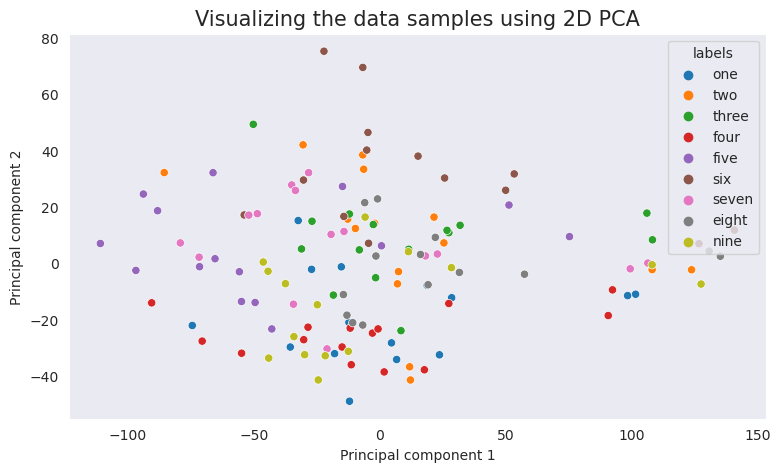

In [11]:
# Visualizing using 2D - PCA projection
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_new = pca.fit_transform(features)

data = pd.DataFrame({"x": X_new[:,0], "y": X_new[:,1],
                    "labels": digits, "nums": nums}).sort_values(by = "nums")

sns.set_style("dark")
fig, ax = plt.subplots(figsize = (9,5))

sns.scatterplot(data = data, x = "x", y = "y", hue = "labels",
ax = ax)
ax.set_xlabel("Principal component 1")
ax.set_ylabel("Principal component 2")
ax.set_title("Visualizing the data samples using 2D PCA",fontsize = 15)
plt.show()

## Part 1. Testing some classic ML Classifiers

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

labels = nums
X = features

X_train, X_test, y_train, y_test = train_test_split(
    X,labels, test_size = 0.30, random_state = 42
)

#### 5.1 Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

gnb = Pipeline([('scaler', StandardScaler()), ('gnb', GaussianNB())])
# gnb = GaussianNB()
y_preds = gnb.fit(X_train, y_train).predict(X_test)

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.36      1.00      0.53         4
           2       0.20      0.33      0.25         3
           3       0.33      0.40      0.36         5
           4       1.00      0.60      0.75         5
           5       0.25      0.33      0.29         3
           6       1.00      0.33      0.50         6
           7       0.20      0.50      0.29         2
           8       1.00      0.67      0.80         6
           9       0.00      0.00      0.00         6

    accuracy                           0.45        40
   macro avg       0.48      0.46      0.42        40
weighted avg       0.55      0.45      0.44        40



/home/chrisnick/miniconda3/envs/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/chrisnick/miniconda3/envs/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/chrisnick/miniconda3/envs/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

#### 5.2 SVM

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
y_preds = clf.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.43      0.75      0.55         4
           2       0.50      1.00      0.67         3
           3       0.67      0.40      0.50         5
           4       1.00      0.60      0.75         5
           5       0.50      0.67      0.57         3
           6       1.00      0.67      0.80         6
           7       0.33      1.00      0.50         2
           8       0.83      0.83      0.83         6
           9       0.00      0.00      0.00         6

    accuracy                           0.60        40
   macro avg       0.58      0.66      0.57        40
weighted avg       0.62      0.60      0.57        40



## Part 2. Deep Learning Models

In [16]:
dataset = "recordings"

X_train, X_test, y_train, y_test, spk_train, spk_test = utils.parser(dataset)

Total wavs: 3000. Fs = 8000 Hz


Extracting mfcc features...: 100%|██████████| 3000/3000 [00:06<00:00, 482.59it/s]


Feature extraction completed with 13 mfccs per frame


calculating delta-deltas...: 100%|██████████| 3000/3000 [00:01<00:00, 2179.26it/s]
Concatenating...: 3000it [00:00, 103483.85it/s]

Splitting in train test split using the default dataset split


#### 5.1 LSTM

In [17]:
from torch.utils.data import DataLoader
from utils import collate_pad_zeros

In [18]:
BATCH_SIZE = 16

In [19]:
train_dset = utils.custom_dataset(X_train, y_train)
train_dloader = DataLoader(train_dset, batch_size = BATCH_SIZE,
                            collate_fn=collate_pad_zeros)